In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("C:\\Users\\AK\\Downloads\\linear_regression_train.csv")
data.head()

,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Target
0,1,-10.429837,21.684251,93.056324,128.914740,1.657315,-34.602633,-70.314374,-89.585318,-98.465642,...,-99.322780,19.560135,25.568291,-40.876179,-116.146068,-82.181299,-99.423518,-41.150654,113.117197,5235.690928
1,2,12.475081,11.652011,-47.621889,-21.892583,-25.844861,-46.951253,-114.500805,-96.257473,-138.354981,...,-89.763107,-8.250307,-8.798353,-23.452091,-56.769063,-26.722372,-97.694304,13.816113,8.711894,-1221.442146
2,3,7.696188,24.729547,43.782383,-53.282523,-69.145794,-57.072335,-114.149171,-105.408739,-71.892560,...,-3.859655,-17.301240,-1.622924,-39.351214,-73.973949,-33.844638,-100.874861,-38.895598,34.488334,-1102.758862
3,4,6.505033,22.092605,-25.161422,4.742729,-20.344550,-50.248793,-89.324731,-104.002016,-160.103875,...,48.557507,-1.997502,-0.856194,-34.259923,-3.113819,13.398035,-94.899866,-77.051331,-16.014027,437.940266
4,5,5.906445,19.909180,24.705865,-51.875251,-24.857500,-25.879977,-37.787560,-99.587673,-47.929647,...,3.556973,-26.643253,-0.976567,-44.127974,-44.249542,-6.166813,-97.099111,-5.426910,-42.191157,755.825367


In [5]:
X, y = data.iloc[:,1:-1],data.iloc[:,-1]

In [6]:
split_length = int(0.9*X.shape[0])
X_train, X_dev = X[:split_length].values, X[split_length:].values
y_train, y_dev = y[:split_length].values.reshape(-1, 1), y[split_length:].values.reshape(-1, 1)

In [7]:
mean_train = np.mean(X_train, axis=0)
std_train = np.std(X_train, axis=0)
X_train = (X_train - mean_train) / (std_train)
X_dev = (X_dev - mean_train) / (std_train)

In [8]:
def predict(X, W, b):
    return np.dot(X, W) + b

In [9]:
def cost_function_and_gradient(X, y, W, b):
    m, n = X.shape
    Z = np.dot(X, W) + b
    err = Z - y
    cost = (1 / (2 * m)) * np.sum(err**2)
    dW = (1 / m) * np.dot(X.T, err)
    db = (1 / m) * np.sum(err)
    return cost, dW, db

In [10]:
def gradient_descent(X, y, alpha, iterations):
    m, n = X.shape
    np.random.seed(42)
    W = np.random.randn(n, 1)
    b = 0
    cost_history = []
    for i in range(iterations):
        cost, dW, db = cost_function_and_gradient(X, y, W, b)
        W -= alpha * dW
        b -= alpha * db
        cost_history.append(cost)
        if (i + 1) % 25 == 0:
            print(f"Iteration: {i+1}/{iterations} -- cost: {cost}")
    return cost_history, W, b

In [11]:
alpha = 0.1
iterations = 250

In [12]:
cost_history, W, b = gradient_descent(X_train, y_train, alpha, iterations)

Iteration: 25/250 -- cost: 78024.98297420981
Iteration: 50/250 -- cost: 58134.991140655286
Iteration: 75/250 -- cost: 58028.47235353614
Iteration: 100/250 -- cost: 58027.897436199724
Iteration: 125/250 -- cost: 58027.89431009566
Iteration: 150/250 -- cost: 58027.894292975565
Iteration: 175/250 -- cost: 58027.894292881145
Iteration: 200/250 -- cost: 58027.89429288063
Iteration: 225/250 -- cost: 58027.89429288063
Iteration: 250/250 -- cost: 58027.89429288063


In [13]:
def mean_squared_error(y_pred, y_true):
    return np.mean((y_pred - y_true)**2)

In [14]:
y_train_pred = predict(X_train, W, b)
y_dev_pred = predict(X_dev, W, b)

In [15]:
mse_train = mean_squared_error(y_train, y_train_pred)
mse_dev = mean_squared_error(y_dev, y_dev_pred)

In [16]:
print(f"Mean Squared Error (Train): {mse_train}")
print(f"Mean Squared Error (Dev): {mse_dev}")

Mean Squared Error (Train): 116055.78858576126
Mean Squared Error (Dev): 116121.87912963015


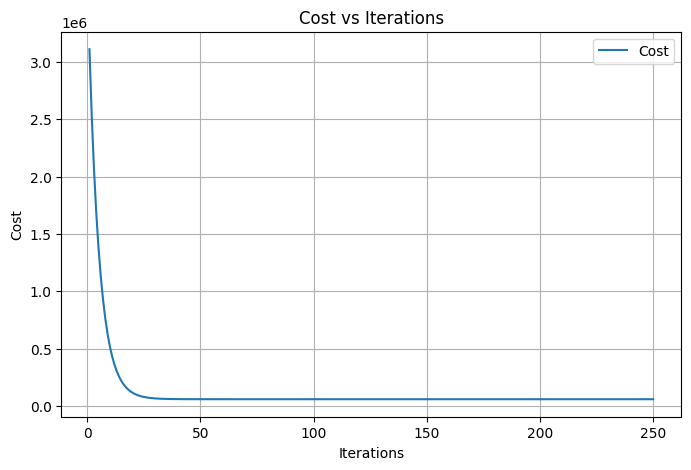

In [17]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, iterations + 1), cost_history, label='Cost')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.legend()
plt.grid()
plt.show()

In [18]:
def r2_score(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true))**2)
    ss_residual = np.sum((y_true - y_pred)**2)
    return 1 - (ss_residual / ss_total)

In [19]:
r2_train = r2_score(y_train, y_train_pred)
r2_dev = r2_score(y_dev, y_dev_pred)

In [20]:
print(f"R2 Score (Train): {r2_train}")
print(f"R2 Score (Dev): {r2_dev}")

R2 Score (Train): 0.9750971084743476
R2 Score (Dev): 0.9746027710488386


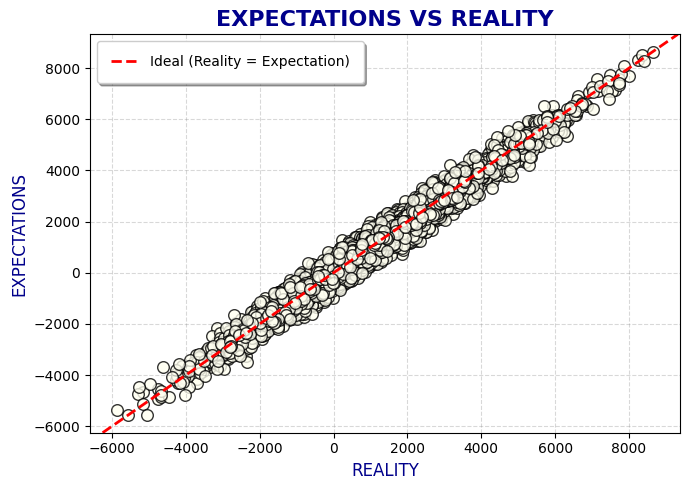

In [21]:
plt.figure(figsize=(7, 5))
plt.scatter(y_dev, y_dev_pred, c='ivory', edgecolor='black', alpha=0.8, s=70)
plt.title("EXPECTATIONS VS REALITY", fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel("REALITY", fontsize=12, color='darkblue')
plt.ylabel("EXPECTATIONS", fontsize=12, color='darkblue')
plt.grid(alpha=0.3, linestyle='--', color='gray')
plt.axline((0, 0), slope=1, color='red', linestyle='--', linewidth=2, label='Ideal (Reality = Expectation)')
plt.legend(loc='upper left', fontsize=10, frameon=True, shadow=True, borderpad=1)
plt.tight_layout()
plt.show()

In [22]:
test_data = pd.read_csv("C:\\Users\\AK\\Downloads\\linear_regression_test.csv")
test_data.head()

,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25
0,1,-13.296650,26.947913,95.977811,-25.167831,-25.863389,-46.432548,-30.120148,-99.220569,-95.771730,...,-46.275616,-36.211021,46.588536,-1.146567,-55.504215,-70.993172,-13.516826,-93.085585,-10.310519,-47.579967
1,2,13.740478,26.632355,-1.056834,113.386950,-26.957189,-40.305571,-8.916968,-99.182781,-65.653323,...,-53.961100,-27.153987,-20.942724,-5.648802,-27.809076,-151.023959,-37.020808,-99.351817,7.806000,75.691539
2,3,5.757701,5.729282,-7.846318,9.063737,-54.522411,-17.102457,-89.391519,-81.827183,-104.007163,...,-31.822475,-89.093319,-9.672241,15.562814,-13.848764,-79.762693,-59.360365,-104.771868,-29.851237,71.920184
3,4,-0.365463,26.040174,15.941714,-47.019942,-32.029202,-34.080470,-105.277503,-104.742190,-135.598491,...,-6.004513,-59.862724,16.676153,-14.092968,-30.554072,-86.409042,26.117858,-97.644419,-57.080490,3.592127
4,5,-7.076549,13.958214,52.805040,-41.259861,-22.072337,-42.073960,-42.290671,-91.763629,-18.252699,...,-38.963648,-42.747877,-10.722687,18.179473,-39.178435,-149.742179,-36.540063,-105.068864,-63.126882,41.053917


In [25]:
X_test = test_data.iloc[:, 1:]

In [26]:
X_test = (X_test - mean_train) / std_train

In [27]:
predictions = np.dot(X_test, W) + b

In [30]:
test_data['PREDICTIONS'] = predictions

In [32]:
test_data.to_csv("LINEAR REGRESSION PREDICTIONS.csv")

In [ ]:
test_da